## Importamos librerías y cargamos el dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("sydney_airbnb.csv")

In [3]:
df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,12351,Sydney City & Harbour at the door,17061,Stuart,NaN,Sydney,-33.865153,151.191896,Private room,100,2,493,2018-11-21,4.83,2,187


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36662 entries, 0 to 36661
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36662 non-null  int64  
 1   name                            36650 non-null  object 
 2   host_id                         36662 non-null  int64  
 3   host_name                       36656 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   36662 non-null  object 
 6   latitude                        36662 non-null  float64
 7   longitude                       36662 non-null  float64
 8   room_type                       36662 non-null  object 
 9   price                           36662 non-null  int64  
 10  minimum_nights                  36662 non-null  int64  
 11  number_of_reviews               36662 non-null  int64  
 12  last_review                     

In [5]:
df.isnull().sum()

id                                    0
name                                 12
host_id                               0
host_name                             6
neighbourhood_group               36662
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       11937
reviews_per_month                 11937
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
df['reviews_per_month'].fillna(value=0, inplace=True)

In [7]:
df['last_review'].fillna(value=("2010-01-01"), inplace=True)

In [8]:
df.isnull().sum()

id                                    0
name                                 12
host_id                               0
host_name                             6
neighbourhood_group               36662
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
df = df.drop(df[(df['reviews_per_month'] == 0 ) & (df['number_of_reviews'] >= 1)].index)

In [10]:
df = df.drop(df[(df['price'] == 0 )].index)

In [11]:
df_general = df.drop(["id", "name", "host_id", "host_name", "neighbourhood_group"], axis=1, inplace=False)

In [12]:
df_general["last_review"] = pd.to_datetime(df_general["last_review"])

In [13]:
df_general.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36530 entries, 0 to 36661
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   neighbourhood                   36530 non-null  object        
 1   latitude                        36530 non-null  float64       
 2   longitude                       36530 non-null  float64       
 3   room_type                       36530 non-null  object        
 4   price                           36530 non-null  int64         
 5   minimum_nights                  36530 non-null  int64         
 6   number_of_reviews               36530 non-null  int64         
 7   last_review                     36530 non-null  datetime64[ns]
 8   reviews_per_month               36530 non-null  float64       
 9   calculated_host_listings_count  36530 non-null  int64         
 10  availability_365                36530 non-null  int64         
dtypes:

In [14]:
df_general["last_review"] = (df_general["last_review"] - pd.Timestamp("2010-01-01")) // pd.Timedelta("1d")

In [149]:
df_general.head(1)

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Sydney,-33.865153,151.191896,Private room,100,2,493,3246,4.83,2,187


In [16]:
df_fil_MN = df_general[(np.abs(stats.zscore(df_general["minimum_nights"])) < 3)]
df_fil_MN.minimum_nights.max()

51

In [17]:
df_fil_NoR = df_general[(np.abs(stats.zscore(df_general["number_of_reviews"])) < 3)]
df_fil_NoR.number_of_reviews.max()

98

In [18]:
df_fil_LR = df_general[(np.abs(stats.zscore(df_general["last_review"])) < 3)]
df_fil_LR.last_review.max()

3262

In [19]:
df_fil_RpM = df_general[(np.abs(stats.zscore(df_general["reviews_per_month"])) < 3)]
df_fil_RpM.reviews_per_month.max()

4.88

In [20]:
df_fil_CHLC = df_general[(np.abs(stats.zscore(df_general["calculated_host_listings_count"])) < 3)]
df_fil_CHLC.calculated_host_listings_count.max()

66

In [21]:
df_ZSc_4 = df_general[(np.abs(stats.zscore(df_general["price"])) < 4)]
df_ZSc_4.price.max()

1501

In [22]:
df_ZSc_3 = df_general[(np.abs(stats.zscore(df_general["price"])) < 3)]
df_ZSc_3.price.max()

1179

In [23]:
df_ZSc_2 = df_general[(np.abs(stats.zscore(df_general["price"])) < 2)]
df_ZSc_2.price.max()

850

In [24]:
df_ZSc_1 = df_general[(np.abs(stats.zscore(df_general["price"])) < 1)]
df_ZSc_1.price.max()

530

### Filtramos el df con 4 limites de outliers distintos distintos

In [25]:
df_fil_ZSc_4=df_general[(np.abs(stats.zscore(df_general["minimum_nights"])) < 3) &
                        (np.abs(stats.zscore(df_general["number_of_reviews"])) < 3) &
                        (np.abs(stats.zscore(df_general["last_review"])) < 3) &
                        (np.abs(stats.zscore(df_general["reviews_per_month"])) < 3) &
                        (np.abs(stats.zscore(df_general["calculated_host_listings_count"])) < 3) &
                        (np.abs(stats.zscore(df_general["price"])) < 4)
                        ]

df_fil_ZSc_4.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000
mean,-33.862993,151.203777,191.502684,3.890665,8.440898,1987.549818,0.588610,3.570314,92.024916
std,0.072179,0.084702,196.043547,4.416280,16.089575,1432.194490,0.958456,8.174077,121.681329
min,-34.135212,150.642903,6.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,-33.898996,151.178490,75.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-33.883290,151.216531,130.000000,2.000000,2.000000,2899.000000,0.130000,1.000000,28.000000
75%,-33.830226,151.262242,220.000000,5.000000,8.000000,3209.000000,0.770000,2.000000,155.000000
max,-33.389728,151.339811,1501.000000,51.000000,98.000000,3262.000000,4.880000,66.000000,365.000000


In [26]:
df_fil_ZSc_3=df_general[(np.abs(stats.zscore(df_general["minimum_nights"])) < 3) &
                            (np.abs(stats.zscore(df_general["number_of_reviews"])) < 3) &
                            (np.abs(stats.zscore(df_general["reviews_per_month"])) < 3) &
                            (np.abs(stats.zscore(df_general["calculated_host_listings_count"])) < 3) &
                            (np.abs(stats.zscore(df_general["price"])) < 3)
                            ]

df_fil_ZSc_3.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,33492.000000,33492.000000,33492.000000,33492.000000,33492.000000,33492.000000,33492.000000,33492.000000,33492.000000
mean,-33.863529,151.203328,183.856503,3.879464,8.484056,1993.575988,0.591660,3.522155,91.546757
std,0.071519,0.084691,172.235278,4.419962,16.128467,1430.397349,0.960368,8.056551,121.390692
min,-34.135212,150.642903,6.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,-33.899098,151.178299,75.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-33.883436,151.216166,130.000000,2.000000,2.000000,2904.000000,0.130000,1.000000,27.000000
75%,-33.830952,151.261835,219.000000,5.000000,8.000000,3210.000000,0.770000,2.000000,154.000000
max,-33.389728,151.339811,1179.000000,51.000000,98.000000,3262.000000,4.880000,66.000000,365.000000


In [27]:
df_fil_ZSc_2=df_general[(np.abs(stats.zscore(df_general["minimum_nights"])) < 3) &
                            (np.abs(stats.zscore(df_general["number_of_reviews"])) < 3) &
                            (np.abs(stats.zscore(df_general["reviews_per_month"])) < 3) &
                            (np.abs(stats.zscore(df_general["calculated_host_listings_count"])) < 3) &
                            (np.abs(stats.zscore(df_general["price"])) < 2)
                            ]

df_fil_ZSc_2.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,33036.000000,33036.000000,33036.000000,33036.000000,33036.000000,33036.000000,33036.000000,33036.000000,33036.000000
mean,-33.864483,151.202509,172.829459,3.858700,8.565141,2003.515529,0.597412,3.461133,90.747457
std,0.070359,0.084693,145.172142,4.424242,16.204653,1427.638337,0.964228,7.892330,120.832548
min,-34.135212,150.642903,6.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,-33.899291,151.177734,75.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-33.883730,151.215631,127.000000,2.000000,2.000000,2911.000000,0.130000,1.000000,27.000000
75%,-33.832354,151.261056,199.000000,5.000000,8.000000,3213.000000,0.790000,2.000000,152.000000
max,-33.389728,151.339811,850.000000,51.000000,98.000000,3262.000000,4.880000,66.000000,365.000000


In [28]:
df_fil_ZSc_1=df_general[(np.abs(stats.zscore(df_general["minimum_nights"])) < 3) &
                            (np.abs(stats.zscore(df_general["number_of_reviews"])) < 3) &
                            (np.abs(stats.zscore(df_general["reviews_per_month"])) < 3) &
                            (np.abs(stats.zscore(df_general["calculated_host_listings_count"])) < 3) &
                            (np.abs(stats.zscore(df_general["price"])) < 1)
                            ]

df_fil_ZSc_1.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,31798.000000,31798.000000,31798.000000,31798.000000,31798.000000,31798.000000,31798.000000,31798.000000,31798.000000
mean,-33.865941,151.200740,153.263444,3.804453,8.743412,2025.480848,0.612095,3.415687,89.401660
std,0.068612,0.084995,106.460210,4.441023,16.372057,1421.853446,0.974500,7.756474,120.008597
min,-34.135212,150.642903,6.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,-33.899698,151.176705,75.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-33.884165,151.214557,120.000000,2.000000,2.000000,2921.000000,0.140000,1.000000,25.500000
75%,-33.834943,151.259664,199.000000,5.000000,8.000000,3215.000000,0.820000,2.000000,149.000000
max,-33.389728,151.339811,530.000000,51.000000,98.000000,3262.000000,4.880000,66.000000,365.000000


## Empezamos con el modelo

* Sacamos el precio del df y lo pasamos a matriz

In [29]:
X = df_fil_ZSc_4.drop("price", axis=1)
y = df_fil_ZSc_4["price"]

* Diferenciamos en categoricas y numéricas

In [30]:
categoricas = ["neighbourhood", "room_type"]
numericas = ["latitude", "longitude", "minimum_nights", "number_of_reviews", "last_review", "reviews_per_month", "calculated_host_listings_count", "availability_365"]

* Transformamos las columnas a valores entre 0 y 1 para que todas puedan ser equivalentes 

In [31]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer_numerico = ("transformer_numerico", MinMaxScaler(), numericas)
transformer_categorico = ("transformer_categorico", OneHotEncoder(), categoricas)

transformer = ColumnTransformer([transformer_numerico, transformer_categorico], remainder="passthrough")

In [32]:
X = transformer.fit_transform(X).toarray()

In [33]:
X = pd.DataFrame(X, columns = transformer.get_feature_names_out())
X.head(1)

,transformer_numerico__latitude,transformer_numerico__longitude,transformer_numerico__minimum_nights,transformer_numerico__number_of_reviews,transformer_numerico__last_review,transformer_numerico__reviews_per_month,transformer_numerico__calculated_host_listings_count,transformer_numerico__availability_365,transformer_categorico__neighbourhood_Ashfield,transformer_categorico__neighbourhood_Auburn,...,transformer_categorico__neighbourhood_Sutherland Shire,transformer_categorico__neighbourhood_Sydney,transformer_categorico__neighbourhood_The Hills Shire,transformer_categorico__neighbourhood_Warringah,transformer_categorico__neighbourhood_Waverley,transformer_categorico__neighbourhood_Willoughby,transformer_categorico__neighbourhood_Woollahra,transformer_categorico__room_type_Entire home/apt,transformer_categorico__room_type_Private room,transformer_categorico__room_type_Shared room
0,0.448411,0.887949,0.08,0.010204,0.67198,0.006148,0.015385,0.879452,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [34]:
transformer.output_indices_

{'transformer_numerico': slice(0, 8, None),
 'transformer_categorico': slice(8, 49, None),
 'remainder': slice(0, 0, None)}

## Practicamos

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [36]:
#LinearRegression
from sklearn.linear_model import LinearRegression
#LogisticRegression
from sklearn.linear_model import LogisticRegression
#Lasso
from sklearn.linear_model import Lasso
#Elastic Net
from sklearn.linear_model import ElasticNet
#Ridge
from sklearn.linear_model import Ridge
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
#KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
#Ada Boost Regressor
from sklearn.ensemble import AdaBoostRegressor
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
#SVR
from sklearn.svm import SVR


#Metrics
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [37]:
def train_evaluate(nombre_modelo, modelo):
    mod=modelo()
    mod.fit(X_train, y_train)
    
    y_predict = mod.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_predict)
    mse = mean_squared_error(y_test, y_predict)
    rmse = mean_squared_error(y_test, y_predict, squared=False)
    r2 = r2_score(y_test, y_predict)
    
    y_pred_train= mod.predict(X_train)
    mae_train =mean_absolute_error(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    r2_train = r2_score(y_train, y_pred_train)

    print(nombre_modelo)
    print()
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R2: {r2}")
    print()
    print(f"MAE Train:{mae_train}")
    print(f"MSE Train:{mse_train}")
    print(f"RMSE Train:{rmse_train}")
    print(f"R2 Train:{r2_train}")
    print()

Con el ejemplo de arriba de zscore de 4

In [38]:
train_evaluate("LinearRegression",LinearRegression)
train_evaluate("Lasso",Lasso)
train_evaluate("ElasticNet",ElasticNet)
train_evaluate("Ridge",Ridge)
train_evaluate("DecisionTreeRegressor",DecisionTreeRegressor)
train_evaluate("KNeighborsRegressor",KNeighborsRegressor)
train_evaluate("GradientBoostingRegressor",GradientBoostingRegressor)
train_evaluate("AdaBoostRegressor",AdaBoostRegressor)
#train_evaluate("RandomForestRegressor",RandomForestRegressor)
#train_evaluate("SVR",SVR)

LinearRegression

MAE: 101.44533752521058
MSE: 27122.854794459603
RMSE: 164.69017819669637
R2: 0.3009537498041316

MAE Train:101.49448267679165
MSE Train:26459.71425605126
RMSE Train:162.66442221964599
R2 Train:0.3092877077360431

Lasso

MAE: 99.75697046628618
MSE: 27538.806391174934
RMSE: 165.94820394079272
R2: 0.29023329260483144

MAE Train:99.86544043548459
MSE Train:26961.469046060967
RMSE Train:164.199479432978
R2 Train:0.2961897506754234

ElasticNet

MAE: 109.9776956250904
MSE: 32628.104005378467
RMSE: 180.63251093138928
R2: 0.15906515266159493

MAE Train:110.70015064551308
MSE Train:32043.201558768942
RMSE Train:179.00614949986758
R2 Train:0.16353468575074936

Ridge

MAE: 100.8563327075116
MSE: 26945.235802153016
RMSE: 164.15004051828015
R2: 0.3055315824650524

MAE Train:100.92977113591895
MSE Train:26287.81952263605
RMSE Train:162.13518903259728
R2 Train:0.3137748992527907

DecisionTreeRegressor

MAE: 118.1895835804959
MSE: 45232.659152924425
RMSE: 212.67971025211696
R2: -0.165

In [39]:
X = df_fil_ZSc_3.drop("price", axis=1)
y = df_fil_ZSc_3["price"]
X = transformer.fit_transform(X).toarray()
X = pd.DataFrame(X, columns = transformer.get_feature_names_out())
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [40]:
train_evaluate("LinearRegression",LinearRegression)
train_evaluate("Lasso",Lasso)
train_evaluate("ElasticNet",ElasticNet)
train_evaluate("Ridge",Ridge)
train_evaluate("DecisionTreeRegressor",DecisionTreeRegressor)
train_evaluate("KNeighborsRegressor",KNeighborsRegressor)
train_evaluate("GradientBoostingRegressor",GradientBoostingRegressor)
train_evaluate("AdaBoostRegressor",AdaBoostRegressor)
#train_evaluate("RandomForestRegressor",RandomForestRegressor)
#train_evaluate("SVR",SVR)

LinearRegression

MAE: 91.19188164337753
MSE: 20301.038985056133
RMSE: 142.481714563856
R2: 0.31745774830985585

MAE Train:91.42284724710379
MSE Train:20031.46833821012
RMSE Train:141.5325698848506
R2 Train:0.3241221270100466

Lasso

MAE: 90.4068557913743
MSE: 20817.82398673845
RMSE: 144.2838313420407
R2: 0.3000828938037593

MAE Train:91.00191718105302
MSE Train:20628.79673336115
RMSE Train:143.6272840840526
R2 Train:0.3039677859315607

ElasticNet

MAE: 101.12993765087985
MSE: 24577.334536323946
RMSE: 156.77159990356654
R2: 0.173684200729192

MAE Train:101.41297943760162
MSE Train:24371.280038134446
RMSE Train:156.11303609287228
R2 Train:0.17769338542215674

Ridge

MAE: 91.05323770349177
MSE: 20298.40775998619
RMSE: 142.4724807111401
R2: 0.3175462128601315

MAE Train:91.3064517041189
MSE Train:20031.00345235205
RMSE Train:141.53092754713384
R2 Train:0.32413781263326846

DecisionTreeRegressor

MAE: 106.8374537202914
MSE: 33532.09411202675
RMSE: 183.11770562134825
R2: -0.1273842208744116

In [41]:
X = df_fil_ZSc_2.drop("price", axis=1)
y = df_fil_ZSc_2["price"]
X = transformer.fit_transform(X).toarray()
X = pd.DataFrame(X, columns = transformer.get_feature_names_out())
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [42]:
train_evaluate("LinearRegression",LinearRegression)
train_evaluate("Lasso",Lasso)
train_evaluate("ElasticNet",ElasticNet)
train_evaluate("Ridge",Ridge)
train_evaluate("DecisionTreeRegressor",DecisionTreeRegressor)
train_evaluate("KNeighborsRegressor",KNeighborsRegressor)
train_evaluate("GradientBoostingRegressor",GradientBoostingRegressor)
train_evaluate("AdaBoostRegressor",AdaBoostRegressor)
#train_evaluate("RandomForestRegressor",RandomForestRegressor)
#train_evaluate("SVR",SVR)

LinearRegression

MAE: 80.15733593655406
MSE: 14141.177286236983
RMSE: 118.9166821191921
R2: 0.3252346454139299

MAE Train:79.07309450296646
MSE Train:13964.67726731823
RMSE Train:118.17223560260773
R2 Train:0.3385797084217097

Lasso

MAE: 80.40846468523593
MSE: 14565.847940025616
RMSE: 120.68905476481956
R2: 0.3049709121698191

MAE Train:79.19097982852708
MSE Train:14375.520889331092
RMSE Train:119.8979603218132
R2 Train:0.3191205900287063

ElasticNet

MAE: 89.06122614558043
MSE: 16962.12569645795
RMSE: 130.2387257940508
R2: 0.190629285777831

MAE Train:88.92377259220312
MSE Train:16955.70095683488
RMSE Train:130.2140582150594
R2 Train:0.1969134369449187

Ridge

MAE: 80.12393519959899
MSE: 14140.732927901036
RMSE: 118.91481374455007
R2: 0.32525584857149237

MAE Train:79.05200637506321
MSE Train:13965.133726772769
RMSE Train:118.17416691803996
R2 Train:0.33855808876378735

DecisionTreeRegressor

MAE: 96.82540259111272
MSE: 24752.332849013197
RMSE: 157.328741331688
R2: -0.18109095965808

In [43]:
X = df_fil_ZSc_1.drop("price", axis=1)
y = df_fil_ZSc_1["price"]
X = transformer.fit_transform(X).toarray()
X = pd.DataFrame(X, columns = transformer.get_feature_names_out())
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [44]:
train_evaluate("LinearRegression",LinearRegression)
train_evaluate("LogisticRegression",LogisticRegression)
train_evaluate("Lasso",Lasso)
train_evaluate("ElasticNet",ElasticNet)
train_evaluate("Ridge",Ridge)
train_evaluate("DecisionTreeRegressor",DecisionTreeRegressor)
train_evaluate("KNeighborsRegressor",KNeighborsRegressor)
train_evaluate("GradientBoostingRegressor",GradientBoostingRegressor)
train_evaluate("AdaBoostRegressor",AdaBoostRegressor)
train_evaluate("RandomForestRegressor",RandomForestRegressor)
train_evaluate("SVR",SVR)

LinearRegression

MAE: 60.27656643081761
MSE: 7102.186399033265
RMSE: 84.27447062446174
R2: 0.3728443782283717

MAE Train:59.83039720311976
MSE Train:7022.087963126002
RMSE Train:83.79789951499978
R2 Train:0.380571862720923



C:\Users\Pablo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression

MAE: 61.493459119496855
MSE: 9259.702515723271
RMSE: 96.22734806552278
R2: 0.1823258131525225

MAE Train:60.29289667896679
MSE Train:9117.31335961087
RMSE Train:95.48462368156912
R2 Train:0.19574911892454938

Lasso

MAE: 61.42710955782885
MSE: 7385.781288743396
RMSE: 85.94056835245736
R2: 0.3478016492158491

MAE Train:60.927861219713876
MSE Train:7338.295348556393
RMSE Train:85.6638508856355
R2 Train:0.3526787698431971

ElasticNet

MAE: 69.65464814644515
MSE: 8729.302698376898
RMSE: 93.43073743890122
R2: 0.22916254884854714

MAE Train:69.3581324451178
MSE Train:8724.107718552994
RMSE Train:93.40293206614551
R2 Train:0.23043433492968735

Ridge

MAE: 60.257149014710244
MSE: 7098.656119388773
RMSE: 84.25352289007726
R2: 0.37315611810692095

MAE Train:59.828879471553556
MSE Train:7022.36783642301
RMSE Train:83.7995694286254
R2 Train:0.38054717470847577

DecisionTreeRegressor

MAE: 74.83559748427673
MSE: 12438.149811320754
RMSE: 111.52645341496678
R2: -0.0983456558770887

In [45]:
regresion_lineal = LinearRegression().fit(X_train, y_train)
regresion_lineal.score(X_test, y_test)

0.3728443782283717

In [46]:
regresion_lineal.coef_

array([ 2.66601623e+02,  1.13386255e+02, -4.33893613e+01, -1.87043767e+01,
       -2.02361297e+01, -3.08219727e+01,  3.37376887e+01,  4.28915874e+01,
        4.36212894e+11,  4.36212894e+11,  4.36212894e+11,  4.36212894e+11,
        4.36212894e+11,  4.36212894e+11,  4.36212894e+11,  4.36212894e+11,
        4.36212894e+11,  4.36212894e+11,  4.36212894e+11,  4.36212894e+11,
        4.36212894e+11,  4.36212894e+11,  4.36212894e+11,  4.36212894e+11,
        4.36212894e+11,  4.36212894e+11,  4.36212894e+11,  4.36212894e+11,
        4.36212894e+11,  4.36212894e+11,  4.36212894e+11,  4.36212894e+11,
        4.36212894e+11,  4.36212894e+11,  4.36212894e+11,  4.36212894e+11,
        4.36212894e+11,  4.36212894e+11,  4.36212894e+11,  4.36212894e+11,
        4.36212894e+11,  4.36212894e+11,  4.36212894e+11,  4.36212894e+11,
        4.36212894e+11,  4.36212894e+11, -8.96019343e+13, -8.96019343e+13,
       -8.96019343e+13])

In [47]:
regresion_lineal.feature_names_in_

array(['transformer_numerico__latitude',
       'transformer_numerico__longitude',
       'transformer_numerico__minimum_nights',
       'transformer_numerico__number_of_reviews',
       'transformer_numerico__last_review',
       'transformer_numerico__reviews_per_month',
       'transformer_numerico__calculated_host_listings_count',
       'transformer_numerico__availability_365',
       'transformer_categorico__neighbourhood_Ashfield',
       'transformer_categorico__neighbourhood_Auburn',
       'transformer_categorico__neighbourhood_Bankstown',
       'transformer_categorico__neighbourhood_Blacktown',
       'transformer_categorico__neighbourhood_Botany Bay',
       'transformer_categorico__neighbourhood_Burwood',
       'transformer_categorico__neighbourhood_Camden',
       'transformer_categorico__neighbourhood_Campbelltown',
       'transformer_categorico__neighbourhood_Canada Bay',
       'transformer_categorico__neighbourhood_Canterbury',
       'transformer_categorico__neigh

<AxesSubplot:xlabel='x'>

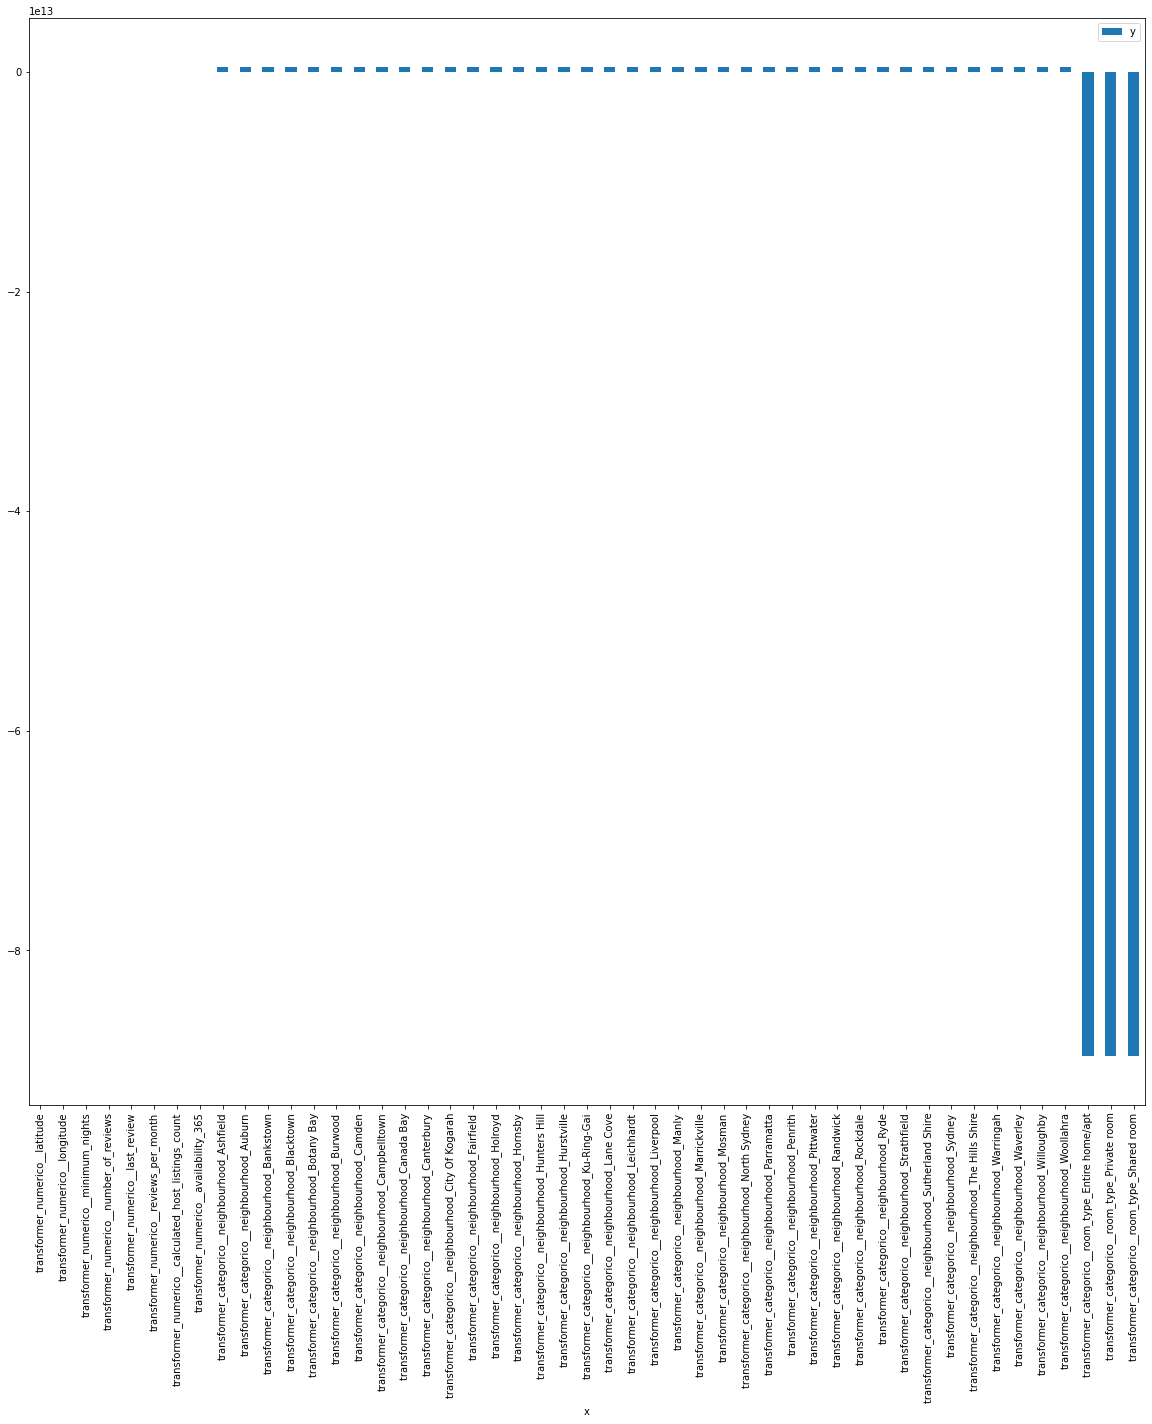

In [65]:
x = regresion_lineal.feature_names_in_
y = regresion_lineal.coef_
df_RL = pd.DataFrame({'x':x, 'y':y})
df_RL.plot('x', 'y', kind='bar', figsize=(20,20))

In [49]:
regresion_lineal.intercept_

89165721360431.44

In [50]:
arbol_decision = DecisionTreeRegressor().fit(X_train, y_train)

In [51]:
arbol_decision.feature_importances_

array([1.65412784e-01, 1.63420549e-01, 5.23835950e-02, 3.79751504e-02,
       5.89007866e-02, 5.73031279e-02, 3.22693113e-02, 8.60498259e-02,
       7.02153093e-04, 5.80349308e-04, 2.35291990e-04, 1.94586591e-04,
       8.44242532e-04, 2.76609924e-04, 6.24189534e-07, 1.32064463e-06,
       7.74638067e-04, 4.19983212e-04, 2.12822209e-04, 1.42962694e-04,
       3.37680549e-04, 4.81842675e-04, 3.91680097e-04, 6.18299659e-04,
       9.07399080e-04, 1.77533944e-04, 1.19853226e-03, 8.72922774e-05,
       1.35541260e-03, 2.43015999e-03, 1.48707431e-03, 2.19977276e-03,
       4.44330778e-04, 1.71447906e-04, 1.60064053e-04, 6.74746422e-04,
       5.40821258e-04, 6.08829415e-04, 2.12477533e-04, 9.40780398e-04,
       3.12033245e-03, 6.78874670e-04, 2.38615354e-03, 1.24275877e-03,
       1.67375928e-03, 1.97600118e-03, 3.13350279e-01, 1.63173897e-03,
       4.13210305e-04])

In [52]:
arbol_decision.feature_names_in_

array(['transformer_numerico__latitude',
       'transformer_numerico__longitude',
       'transformer_numerico__minimum_nights',
       'transformer_numerico__number_of_reviews',
       'transformer_numerico__last_review',
       'transformer_numerico__reviews_per_month',
       'transformer_numerico__calculated_host_listings_count',
       'transformer_numerico__availability_365',
       'transformer_categorico__neighbourhood_Ashfield',
       'transformer_categorico__neighbourhood_Auburn',
       'transformer_categorico__neighbourhood_Bankstown',
       'transformer_categorico__neighbourhood_Blacktown',
       'transformer_categorico__neighbourhood_Botany Bay',
       'transformer_categorico__neighbourhood_Burwood',
       'transformer_categorico__neighbourhood_Camden',
       'transformer_categorico__neighbourhood_Campbelltown',
       'transformer_categorico__neighbourhood_Canada Bay',
       'transformer_categorico__neighbourhood_Canterbury',
       'transformer_categorico__neigh

<AxesSubplot:xlabel='x'>

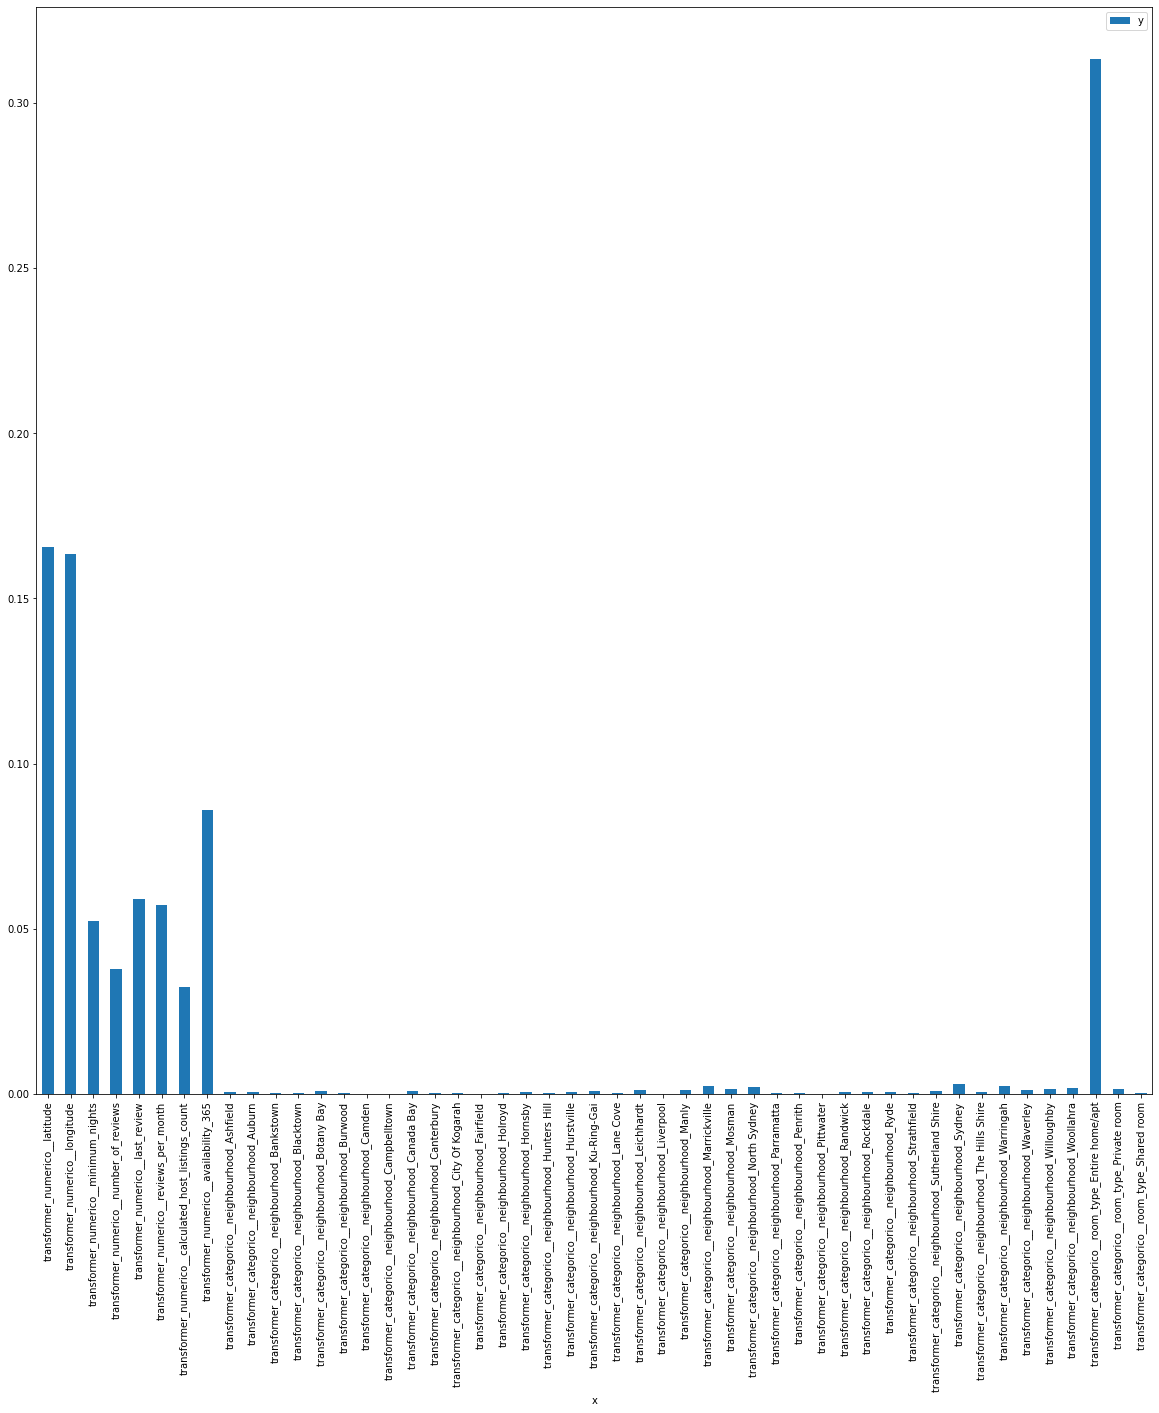

In [66]:
x = arbol_decision.feature_names_in_
y = arbol_decision.feature_importances_
df_AD = pd.DataFrame({'x':x, 'y':y})
df_AD.plot('x', 'y', kind='bar', figsize=(20,20))

In [55]:
gradiente = GradientBoostingRegressor().fit(X_train, y_train)

In [56]:
gradiente.feature_importances_

array([5.30629521e-02, 7.11210030e-02, 2.81842384e-02, 1.46501845e-03,
       2.17821115e-02, 3.61911909e-02, 1.32350984e-02, 5.06868215e-02,
       0.00000000e+00, 1.94679490e-04, 0.00000000e+00, 5.24193910e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.02462864e-05,
       0.00000000e+00, 8.02107074e-05, 2.17287763e-04, 0.00000000e+00,
       1.83280091e-04, 0.00000000e+00, 1.02194682e-03, 3.40427924e-04,
       1.06626595e-03, 5.17803595e-05, 2.38865162e-04, 9.54120809e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.68494848e-04,
       8.93052616e-05, 0.00000000e+00, 3.38550671e-04, 1.56756700e-03,
       1.97904904e-03, 0.00000000e+00, 6.06041506e-04, 0.00000000e+00,
       1.97180200e-04, 6.02905247e-04, 7.10240714e-01, 1.60402946e-03,
       2.41619821e-03])

In [57]:
gradiente.feature_names_in_

array(['transformer_numerico__latitude',
       'transformer_numerico__longitude',
       'transformer_numerico__minimum_nights',
       'transformer_numerico__number_of_reviews',
       'transformer_numerico__last_review',
       'transformer_numerico__reviews_per_month',
       'transformer_numerico__calculated_host_listings_count',
       'transformer_numerico__availability_365',
       'transformer_categorico__neighbourhood_Ashfield',
       'transformer_categorico__neighbourhood_Auburn',
       'transformer_categorico__neighbourhood_Bankstown',
       'transformer_categorico__neighbourhood_Blacktown',
       'transformer_categorico__neighbourhood_Botany Bay',
       'transformer_categorico__neighbourhood_Burwood',
       'transformer_categorico__neighbourhood_Camden',
       'transformer_categorico__neighbourhood_Campbelltown',
       'transformer_categorico__neighbourhood_Canada Bay',
       'transformer_categorico__neighbourhood_Canterbury',
       'transformer_categorico__neigh

<AxesSubplot:xlabel='x'>

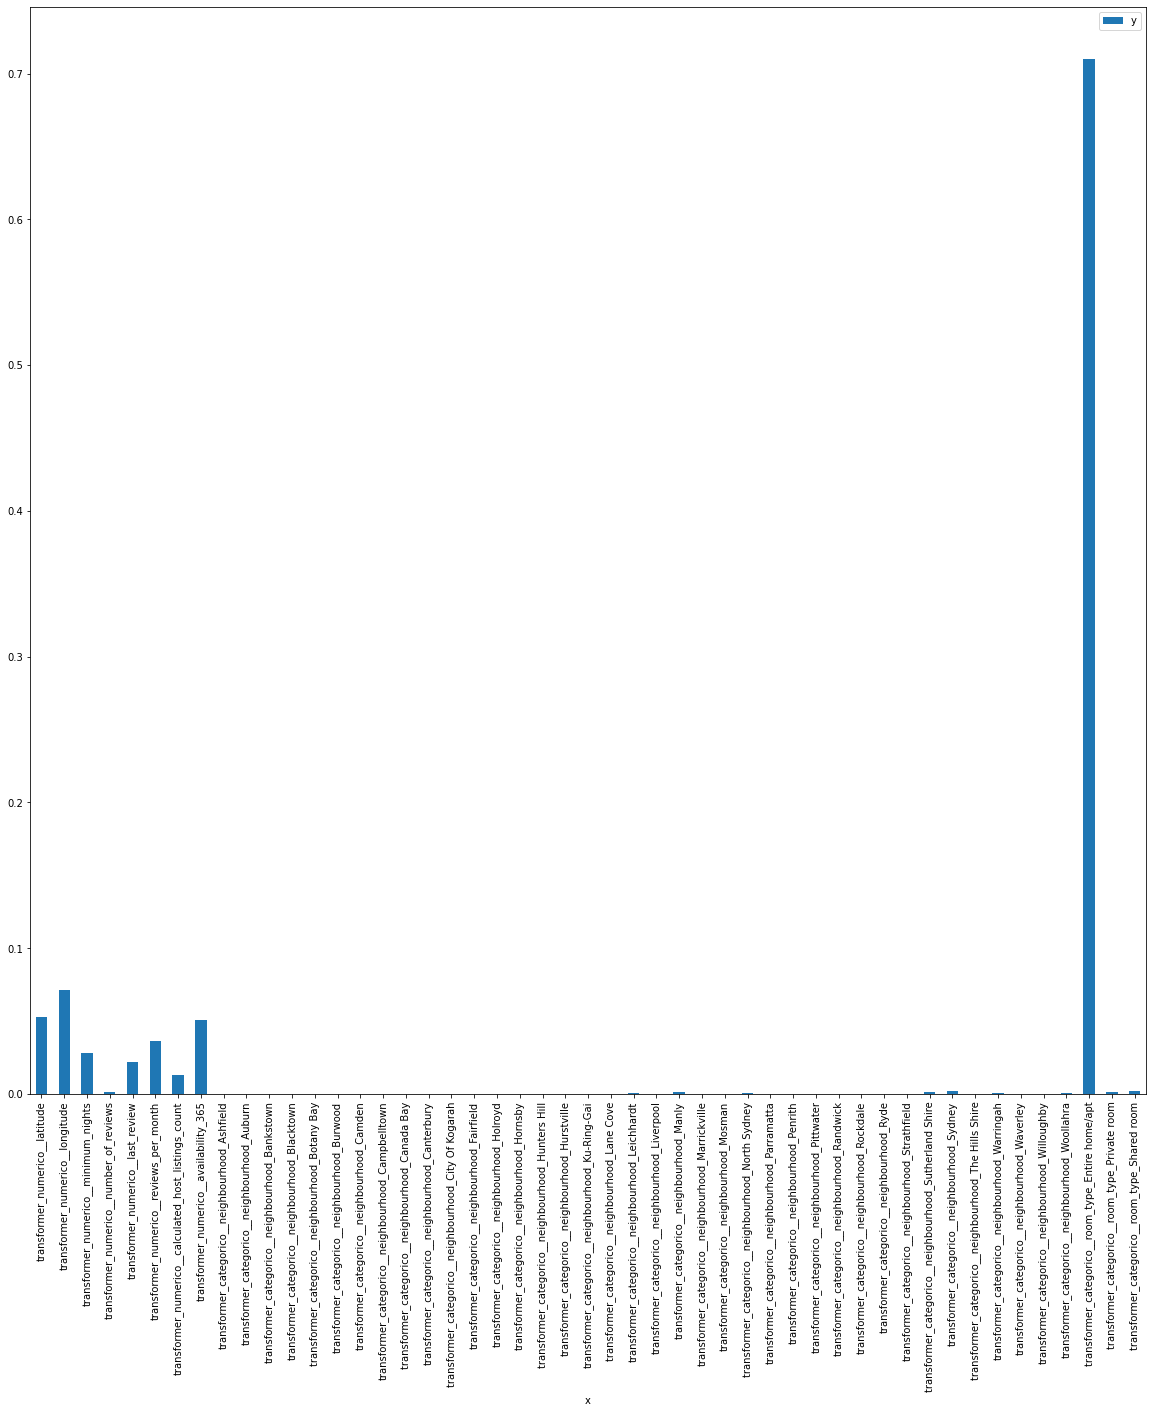

In [67]:
x = gradiente.feature_names_in_
y = gradiente.feature_importances_
df_grad = pd.DataFrame({'x':x, 'y':y})
df_grad.plot('x', 'y', kind='bar', figsize=(20,20))

<function matplotlib.pyplot.show(close=None, block=None)>

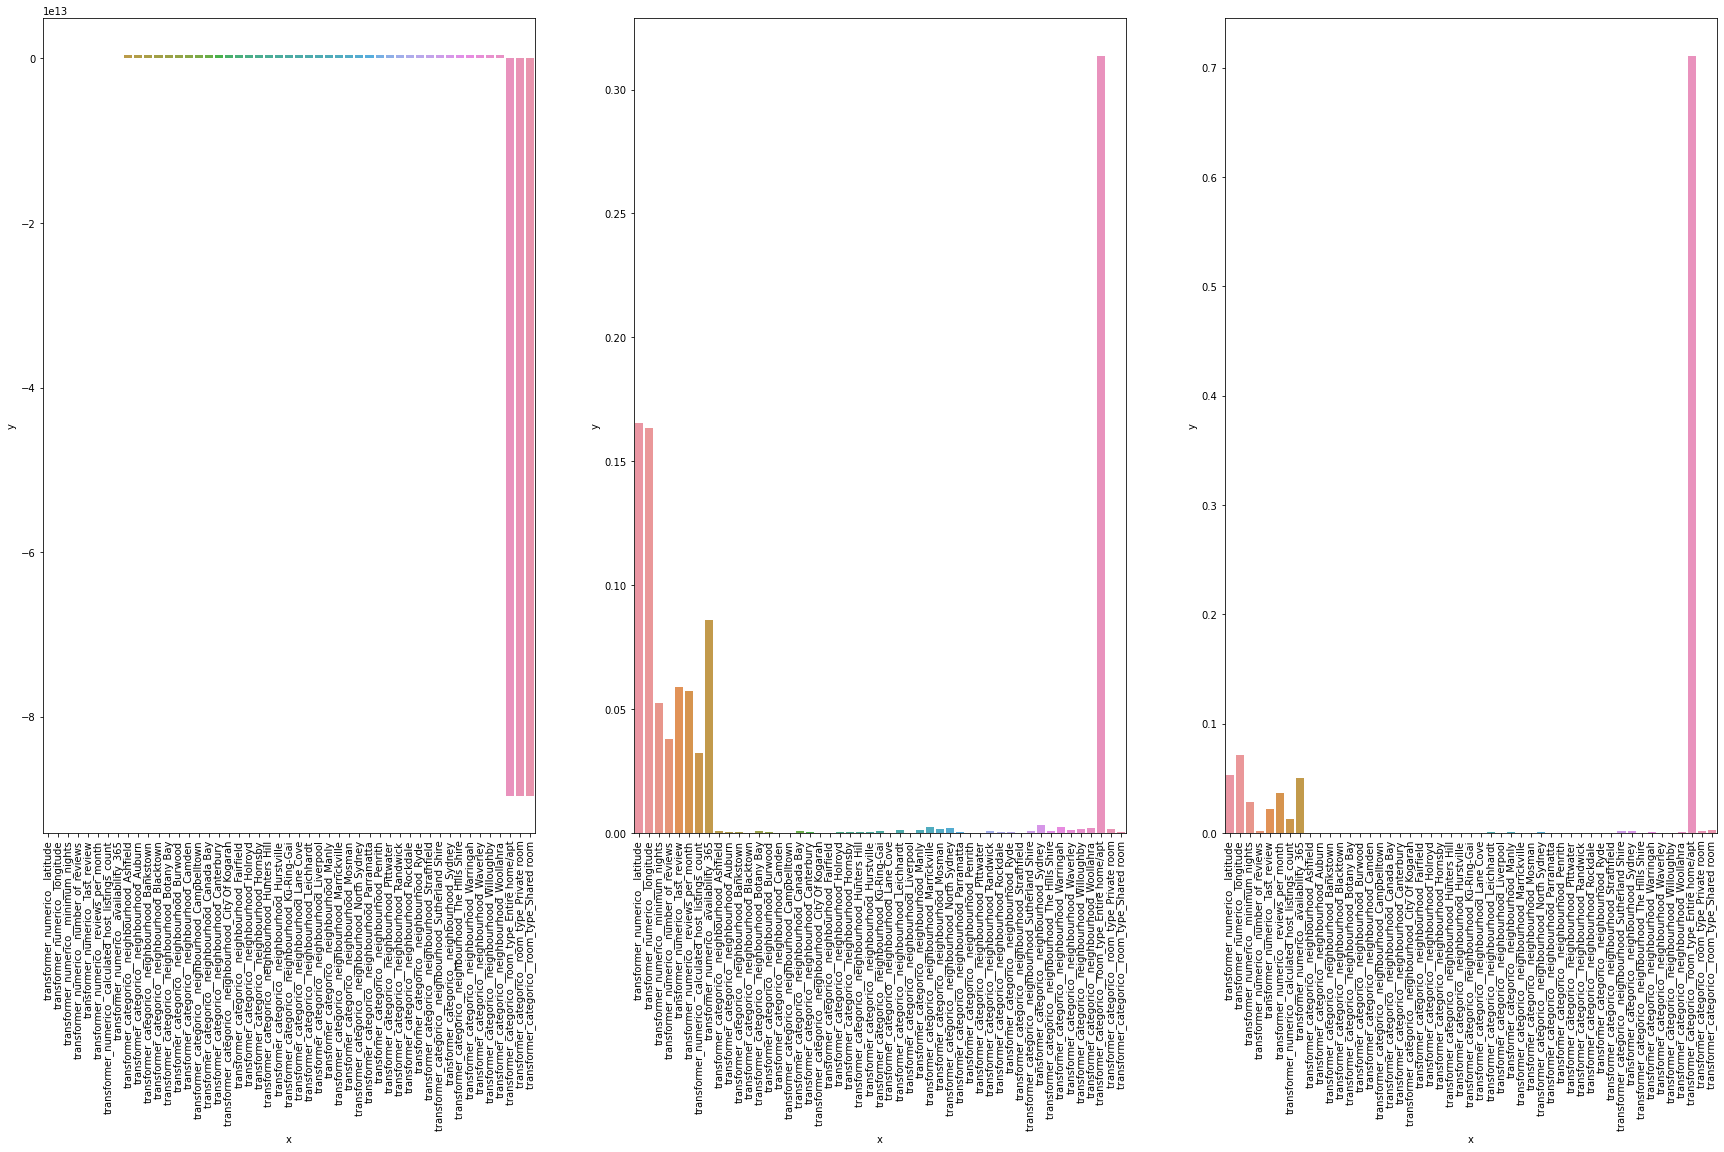

In [72]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30, 15))

plt.subplot(1,3,1)
sns.barplot(data=df_RL,x="x", y="y")
plt.xticks(rotation=90)
plt.ylim()

plt.subplot(1,3,2)
sns.barplot(data=df_AD,x="x", y="y")
plt.xticks(rotation=90)
plt.ylim()

plt.subplot(1,3,3)
sns.barplot(data=df_grad,x="x", y="y")
plt.xticks(rotation=90)
plt.ylim()

plt.show

In [78]:
support = SVR(kernel = 'linear').fit(X_train, y_train)
support.score(X_test, y_test)

0.3164886174378104

In [84]:
support.coef_

array([[ 3.30881630e+01,  4.20154063e+01, -3.54371459e+01,
        -1.27590621e+00, -1.05723323e+01, -1.31856544e+01,
         2.54471349e+01,  2.60439130e+01, -1.35213710e+01,
         3.85022451e+00, -6.00000000e+00, -8.14325137e+00,
        -1.51539584e+00, -3.34961113e+00,  3.78510692e+00,
         6.69220315e+00,  4.15785114e-02, -9.00000000e+00,
         1.00000000e+00, -1.40000000e+01, -7.00434434e+00,
        -1.60000000e+01,  6.02669606e+00, -3.70670666e+00,
        -6.22992199e+00, -4.03616404e+00,  1.13130776e+01,
         3.93118695e+00,  2.17281090e+01, -6.76186980e+00,
         9.67228726e+00, -1.63267697e+00, -9.14119117e+00,
         4.00000000e+00,  3.75490943e+01, -2.50554557e+00,
        -3.92108254e+00, -1.28174505e+01, -4.51839318e+00,
         6.00839157e+00,  7.42888800e+00, -5.49941202e+00,
        -3.76537636e+00,  1.14843518e+01, -4.91534132e+00,
         1.34739101e+01,  7.58860356e+01, -2.18792469e+01,
        -5.40067888e+01]])

In [85]:
support.feature_names_in_

array(['transformer_numerico__latitude',
       'transformer_numerico__longitude',
       'transformer_numerico__minimum_nights',
       'transformer_numerico__number_of_reviews',
       'transformer_numerico__last_review',
       'transformer_numerico__reviews_per_month',
       'transformer_numerico__calculated_host_listings_count',
       'transformer_numerico__availability_365',
       'transformer_categorico__neighbourhood_Ashfield',
       'transformer_categorico__neighbourhood_Auburn',
       'transformer_categorico__neighbourhood_Bankstown',
       'transformer_categorico__neighbourhood_Blacktown',
       'transformer_categorico__neighbourhood_Botany Bay',
       'transformer_categorico__neighbourhood_Burwood',
       'transformer_categorico__neighbourhood_Camden',
       'transformer_categorico__neighbourhood_Campbelltown',
       'transformer_categorico__neighbourhood_Canada Bay',
       'transformer_categorico__neighbourhood_Canterbury',
       'transformer_categorico__neigh

## Prueba para quitar room_type

In [145]:
df_no_neigh_CHLC_RpM_NoR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31798 entries, 1 to 36661
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   latitude          31798 non-null  float64
 1   longitude         31798 non-null  float64
 2   room_type         31798 non-null  object 
 3   price             31798 non-null  int64  
 4   minimum_nights    31798 non-null  int64  
 5   last_review       31798 non-null  int64  
 6   availability_365  31798 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 2.9+ MB


In [146]:
df_no_neigh_CHLC_RpM_NoR_LR = df_no_neigh_CHLC_RpM_NoR.drop(["last_review"], axis=1)

In [147]:
X = df_no_neigh_CHLC_RpM_NoR_LR.drop("price", axis=1)
y = df_no_neigh_CHLC_RpM_NoR_LR["price"]
categoricas = ["room_type"]
numericas = ["latitude", "longitude", "minimum_nights", "availability_365"]
transformer_numerico = ("transformer_numerico", MinMaxScaler(), numericas)
transformer_categorico = ("transformer_categorico", OneHotEncoder(), categoricas)
transformer = ColumnTransformer([transformer_numerico, transformer_categorico], remainder="passthrough")
X = transformer.fit_transform(X)
X = pd.DataFrame(X, columns = transformer.get_feature_names_out())
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [148]:
train_evaluate("LinearRegression",LinearRegression)
train_evaluate("GradientBoostingRegressor",GradientBoostingRegressor)

LinearRegression

MAE: 61.52058176100629
MSE: 7414.412281839623
RMSE: 86.10698160915653
R2: 0.3452734012555241

MAE Train:60.96055748909762
MSE Train:7362.449108022685
RMSE Train:85.80471495216732
R2 Train:0.3505481331560669

GradientBoostingRegressor

MAE: 58.30687547234038
MSE: 6858.524510226783
RMSE: 82.8162092239604
R2: 0.39436084017272155

MAE Train:57.225037986351076
MSE Train:6622.187241609951
RMSE Train:81.37682250868457
R2 Train:0.4158476610769114



In [103]:
gradiente2 = GradientBoostingRegressor().fit(X_train, y_train)

In [104]:
gradiente2.feature_importances_

array([2.14555490e-01, 2.51303938e-01, 2.08970993e-01, 6.89060586e-03,
       5.51899851e-02, 4.06586116e-02, 8.52221574e-02, 9.38708120e-02,
       1.39274071e-03, 4.40628449e-03, 0.00000000e+00, 0.00000000e+00,
       1.68947273e-03, 1.22442645e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.76259841e-04, 8.75340646e-04, 1.30265646e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.03196623e-03, 5.74432105e-04,
       1.67652799e-03, 0.00000000e+00, 0.00000000e+00, 1.12890660e-03,
       0.00000000e+00, 4.79107763e-04, 0.00000000e+00, 3.37717531e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.22196906e-03,
       9.47304664e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.16379564e-04, 2.26508989e-03])

In [105]:
gradiente2.feature_names_in_

array(['transformer_numerico__latitude',
       'transformer_numerico__longitude',
       'transformer_numerico__minimum_nights',
       'transformer_numerico__number_of_reviews',
       'transformer_numerico__last_review',
       'transformer_numerico__reviews_per_month',
       'transformer_numerico__calculated_host_listings_count',
       'transformer_numerico__availability_365',
       'transformer_categorico__neighbourhood_Ashfield',
       'transformer_categorico__neighbourhood_Auburn',
       'transformer_categorico__neighbourhood_Bankstown',
       'transformer_categorico__neighbourhood_Blacktown',
       'transformer_categorico__neighbourhood_Botany Bay',
       'transformer_categorico__neighbourhood_Burwood',
       'transformer_categorico__neighbourhood_Camden',
       'transformer_categorico__neighbourhood_Campbelltown',
       'transformer_categorico__neighbourhood_Canada Bay',
       'transformer_categorico__neighbourhood_Canterbury',
       'transformer_categorico__neigh

<AxesSubplot:xlabel='x'>

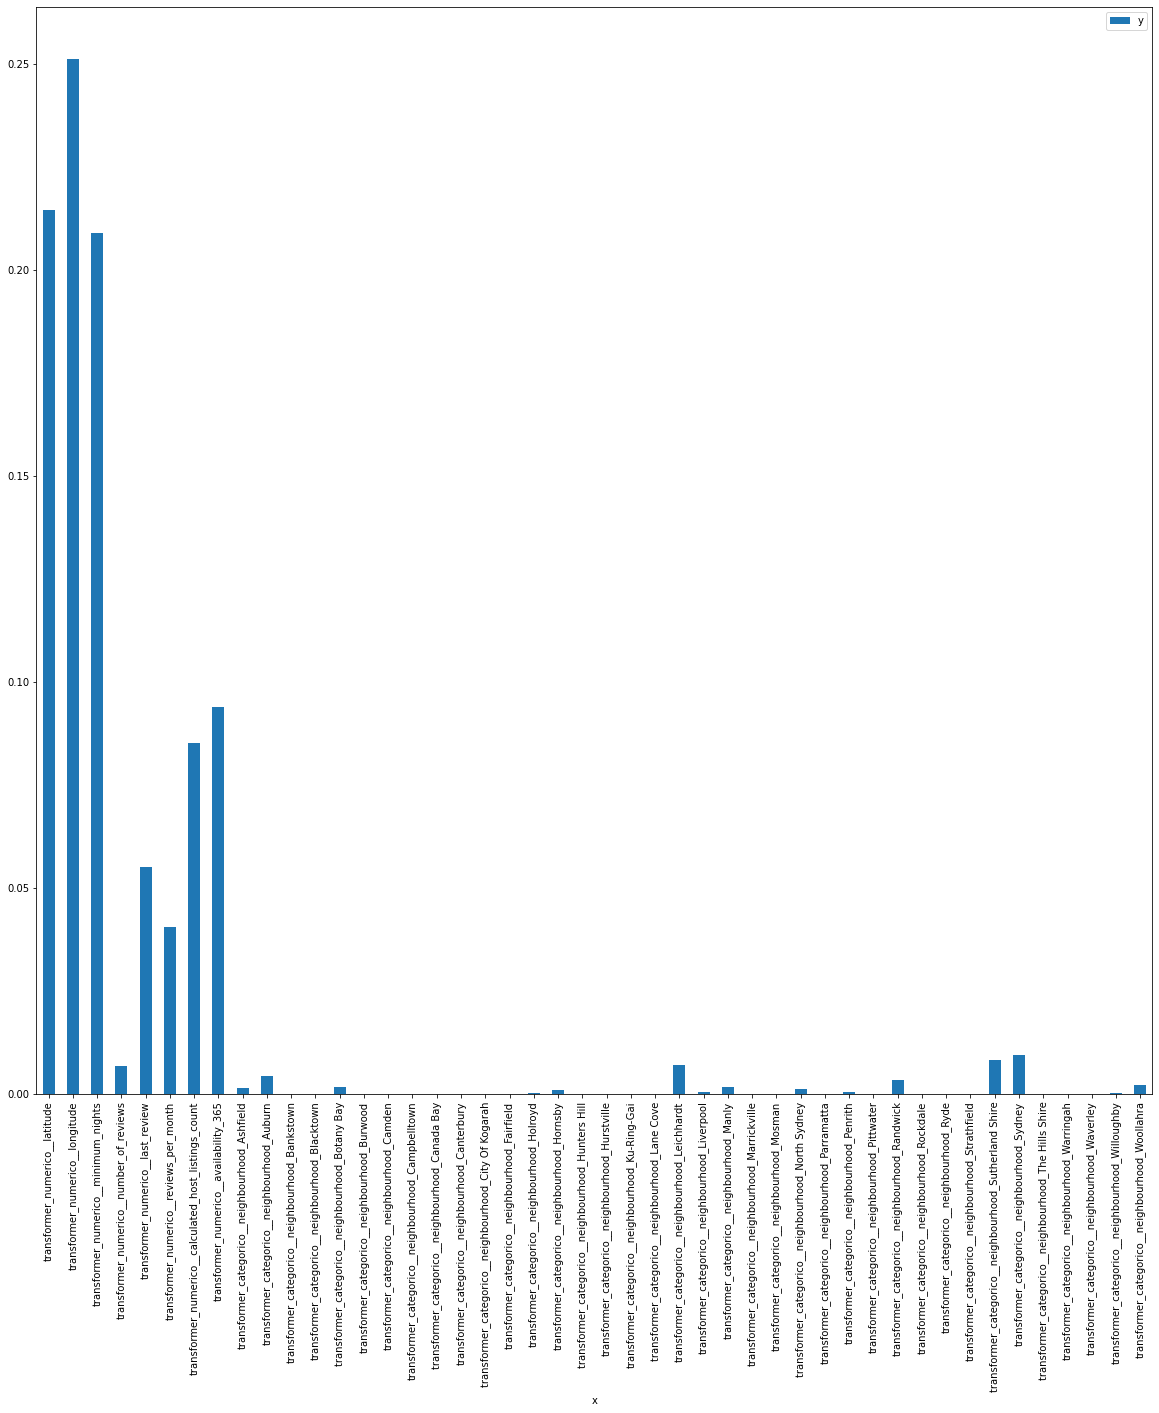

In [106]:
x = gradiente2.feature_names_in_
y = gradiente2.feature_importances_
df_grad = pd.DataFrame({'x':x, 'y':y})
df_grad.plot('x', 'y', kind='bar', figsize=(20,20))

*Vemos que empeoran las predicciones

## Guardamos la función

In [59]:
import pickle

In [144]:
pickle.dump(gradiente, open('gradiente_Zs_1.pkl', 'wb'))

In [61]:
modeloprueba = pickle.load(open('gradiente_Zs_1.pkl', 'rb'))

In [62]:
modeloprueba.feature_importances_

array([5.30629521e-02, 7.11210030e-02, 2.81842384e-02, 1.46501845e-03,
       2.17821115e-02, 3.61911909e-02, 1.32350984e-02, 5.06868215e-02,
       0.00000000e+00, 1.94679490e-04, 0.00000000e+00, 5.24193910e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.02462864e-05,
       0.00000000e+00, 8.02107074e-05, 2.17287763e-04, 0.00000000e+00,
       1.83280091e-04, 0.00000000e+00, 1.02194682e-03, 3.40427924e-04,
       1.06626595e-03, 5.17803595e-05, 2.38865162e-04, 9.54120809e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.68494848e-04,
       8.93052616e-05, 0.00000000e+00, 3.38550671e-04, 1.56756700e-03,
       1.97904904e-03, 0.00000000e+00, 6.06041506e-04, 0.00000000e+00,
       1.97180200e-04, 6.02905247e-04, 7.10240714e-01, 1.60402946e-03,
       2.41619821e-03])

In [63]:
modeloprueba.feature_names_in_

array(['transformer_numerico__latitude',
       'transformer_numerico__longitude',
       'transformer_numerico__minimum_nights',
       'transformer_numerico__number_of_reviews',
       'transformer_numerico__last_review',
       'transformer_numerico__reviews_per_month',
       'transformer_numerico__calculated_host_listings_count',
       'transformer_numerico__availability_365',
       'transformer_categorico__neighbourhood_Ashfield',
       'transformer_categorico__neighbourhood_Auburn',
       'transformer_categorico__neighbourhood_Bankstown',
       'transformer_categorico__neighbourhood_Blacktown',
       'transformer_categorico__neighbourhood_Botany Bay',
       'transformer_categorico__neighbourhood_Burwood',
       'transformer_categorico__neighbourhood_Camden',
       'transformer_categorico__neighbourhood_Campbelltown',
       'transformer_categorico__neighbourhood_Canada Bay',
       'transformer_categorico__neighbourhood_Canterbury',
       'transformer_categorico__neigh

<AxesSubplot:xlabel='x'>

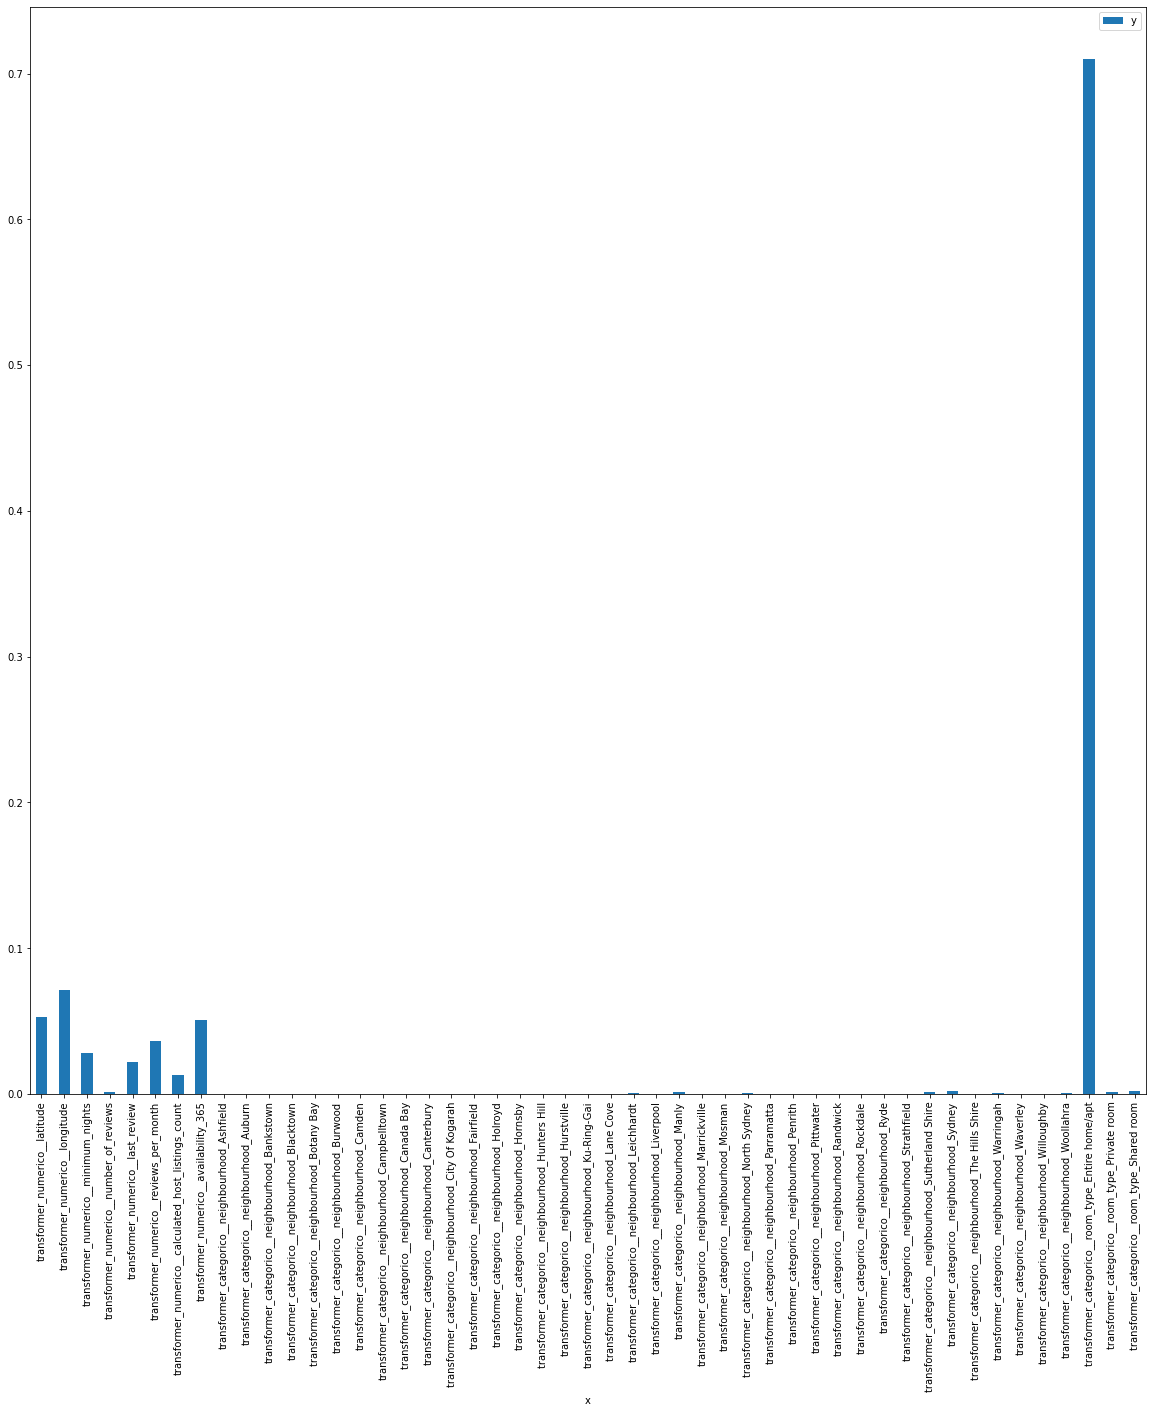

In [64]:
x = modeloprueba.feature_names_in_
y = modeloprueba.feature_importances_
df = pd.DataFrame({'x':x, 'y':y})
df.plot('x', 'y', kind='bar', figsize=(20,20))